# Space X Falcon 9 Landing Prediction

## The project of The Introduction to Data Exploration Methods lecture

*   Done by Samir Boudaa, id = 52739  (2nd year Master in Computer Science - Data Scientist)

### Introduction: 

In this project, our objective is to predict the successful landing of the Falcon 9 first stage. SpaceX offers Falcon 9 rocket launches at a price of 62 million dollars, which is significantly lower than other providers charging upwards of 165 million dollars per launch. This cost reduction is primarily attributed to SpaceX's ability to reuse the first stage of the rocket. Therefore, by accurately predicting the landing outcome of the first stage, we can estimate the cost of a launch. This predictive information can be valuable for potential competitors looking to bid against SpaceX for rocket launch contracts. In this lab, the focus will be on collecting and formatting data from an API to facilitate our analysis. 

### About the SpaceX:

SpaceX, short for Space Exploration Technologies Corp., is an American aerospace manufacturer and space transportation company founded by Elon Musk in 2002. SpaceX is known for its ambitious goal of reducing space transportation costs to enable the colonization of Mars. The company has developed a series of rockets, spacecraft, and other technologies to achieve this vision.

### Phase 1: ASK

**1- business task:**

The Falcon 9 rocket launches historical data analysis, the way they behave and their key features to help build a model for landing predictions.

- How does the mass of the rocket affect the landing?
- Does the site launch have an impact on the rocket landing ?
- What is the effect of number of successful flights in a given site on the rocket landing?
- Can the orbit type affect the rocket landing?
- Is there an influence on having legs in the rocket landing? 

**2- Key Stakeholders:**
- Dr. inz Godlove Suila Kuaban (Our teacher)
- My classmate teams


### Phase 2: PREPARE

**1- About the data:**
    
The data is publicly available on the SpaceX Company website and for this project we can have in this url: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv. This dataset includes records of the date, FlightNumber, Orbit, LaunchSite..etc of every rocket lunch.

This data is credible, unbias and ROCCC (Reliable, Original, Comprehensive, Current, Cited). The data respected the privacy, security, openness and the accessibility aspects and checked for the
integrity (the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle).


**2- Installing and loading common packages and libraries:**

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

**3- Upload the Dataset :**

In [2]:
data=pd.read_csv('dataset_part_1.csv')

**4- Exploring data which we have imported:**

- **We can explore our data by using these following codes:** data.head(); data.descripe(); data.info ; data.dtypes; data.columns, data.shape;


In [3]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [4]:
data.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [5]:
data.shape

(90, 17)

In [6]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963
std,26.124701,4870.916417,1.213172,1.595288,4.194417,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2482.000000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4535.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,9600.000000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093


In [7]:
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

**5- Arranging the data:**

Sorting the data as we need it

In [8]:
data = data.sort_values(by=['FlightNumber'], ascending=True)

In [9]:
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


## Phase 3: PROCESS

In this phase the data will be cleaned and manipulated to make it easy and ready to be analyzed in the next phase.

**1- Duplicate values :**

In [10]:
data.duplicated().sum()

0

Remove daplicated data:

In [11]:
data = data.drop_duplicates()

**2- Null values:**

Identify and calculate the percentage of the missing values in each attribute

In [12]:
data.isnull().sum()/data.shape[0]*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        5.555556
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

We have null values in "PayloadMass" and "LandingPad". For the  "LandingPad" we will let them because we don't need it in the model building but we need the "PayloadMass". To handle the missing values for the "PayloadMass" column, we will calculate the mean for the PayloadMass using the .mean(). Then use it to replace np.nan values in the data with the mean we calculated.

In [13]:
# Calculate the mean value of PayloadMass column
mean = data["PayloadMass"].mean()
# Replace the np.nan values with its mean value
data["PayloadMass"] = data["PayloadMass"].replace(np.nan, mean)

In [14]:
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

## Phase 4: ANALYZE

**1- Calculate the number of launches on each site**

The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .The location of each Launch Is placed in the column "LaunchSite".

In [15]:
# Apply value_counts() on column LaunchSite
value_counts_result = data['LaunchSite'].value_counts()
value_counts_result

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

**2- Calculate the number and occurrence of each orbit**

In [16]:
# Apply value_counts on Orbit column
value_counts_result_orbit = data['Orbit'].value_counts()
value_counts_result_orbit

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

**3- Calculate the number and occurence of mission outcome per orbit type**

In [17]:
# landing_outcomes = values on Outcome column
landing_outcomes =  data['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.

In [18]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [19]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

**4- Create a landing outcome label from Outcome column**

Using the <code>Outcome</code>, we create a list where the element is zero if the corresponding row in <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:

In [20]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
data['landing_class'] = data['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)
data[['landing_class','Outcome']]

,landing_class,Outcome
0,0,None None
1,0,None None
2,0,None None
3,0,False Ocean
4,0,None None
...,...,...
85,1,True ASDS
86,1,True ASDS
87,1,True ASDS
88,1,True ASDS


This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the first stage did not land successfully; one means the first stage landed Successfully

In [21]:
data['Class']=data['landing_class']
data[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [22]:
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


We can use the following line of code to determine the success rate:

In [23]:
data["Class"].mean()

0.6666666666666666

## Phase 5: SHARE

**1- Visualize the relationship between Flight Number and Payload:**

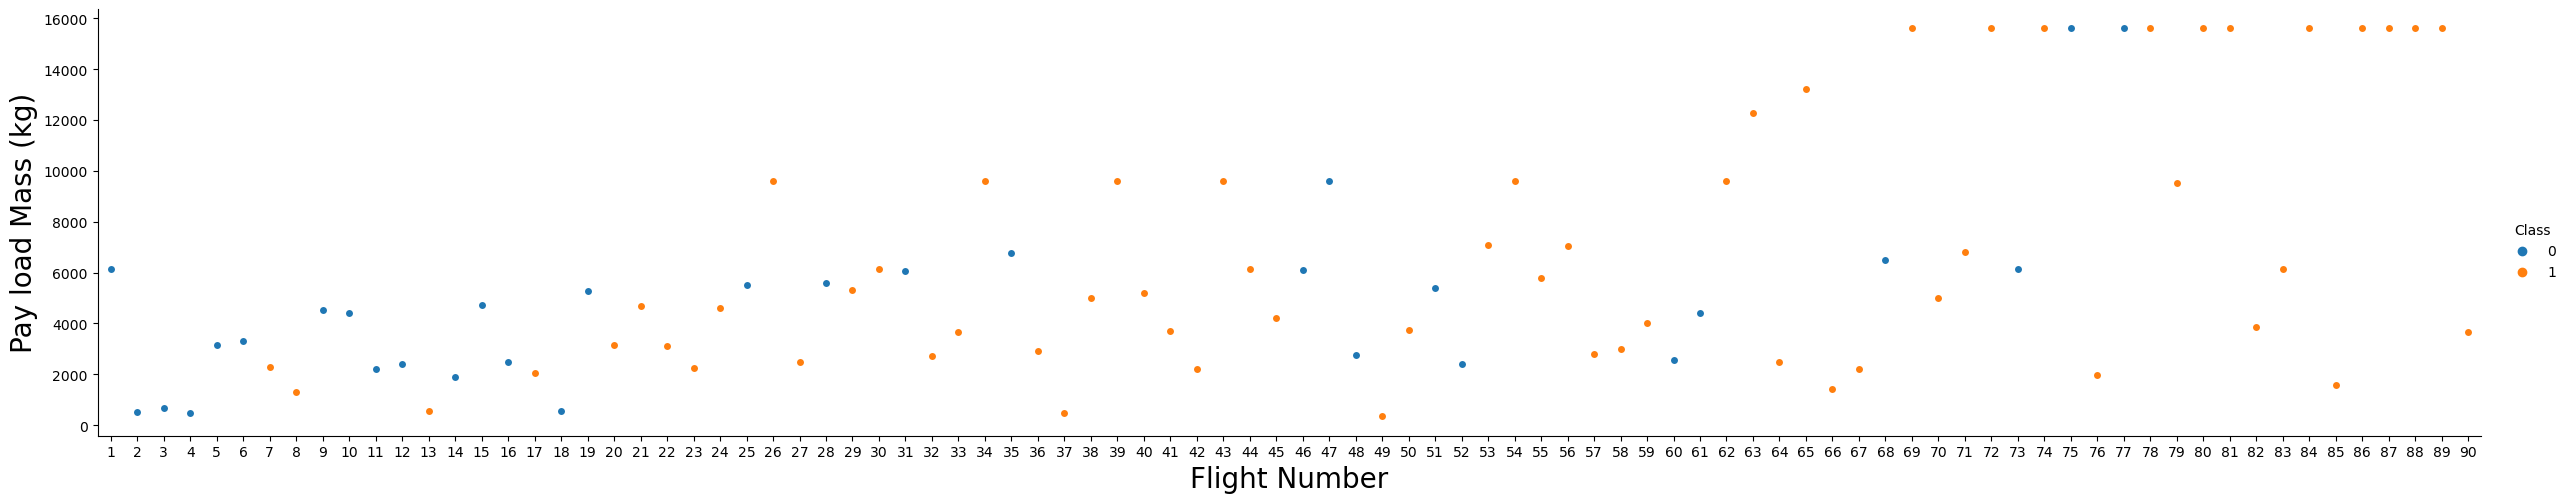

In [24]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

We notice also that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

**2- Visualize the relationship between Flight Number and Launch Site**

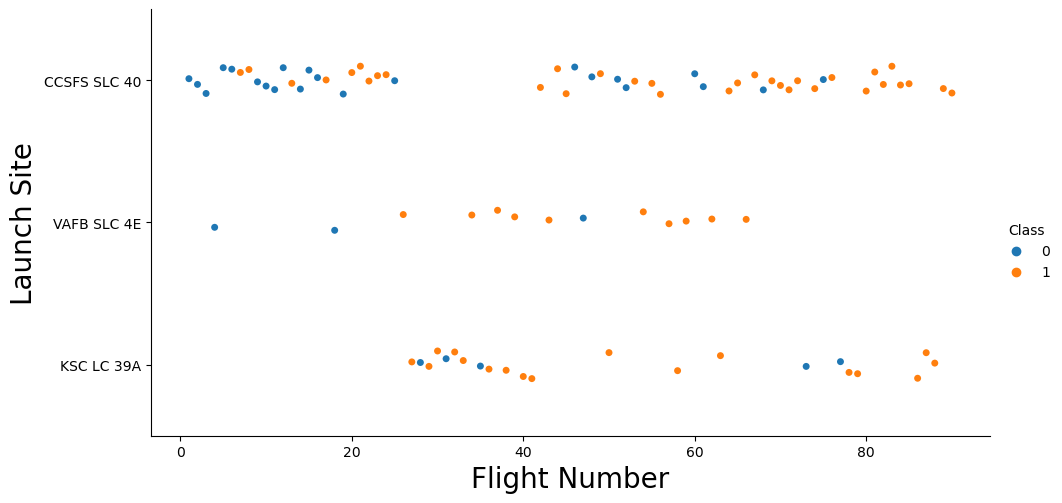

In [25]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=data, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully

**3- Visualize the relationship between Payload and Launch Site**

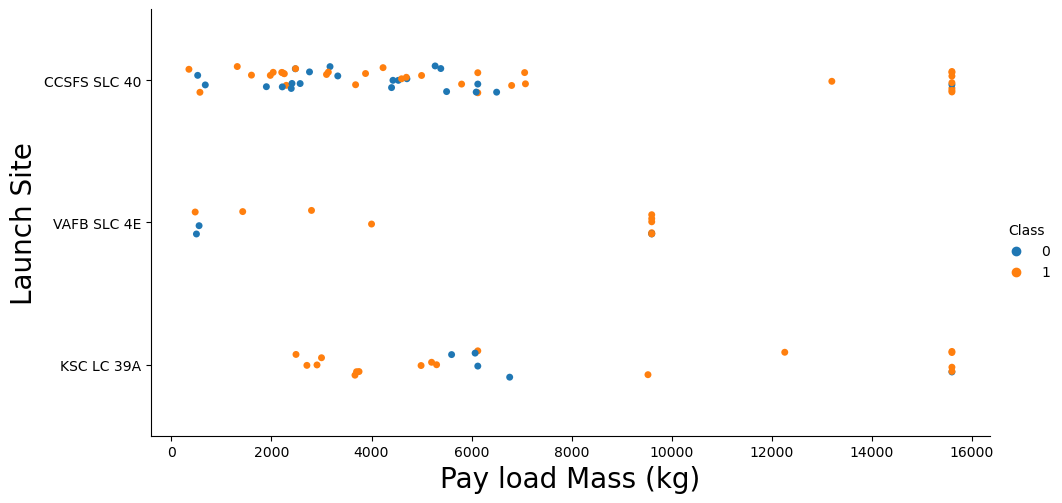

In [26]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=data, aspect = 2)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

From this chart we find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

**4- Visualize the relationship between success rate of each orbit type**

Next, we want to visually check if there are any relationship between success rate and orbit type.

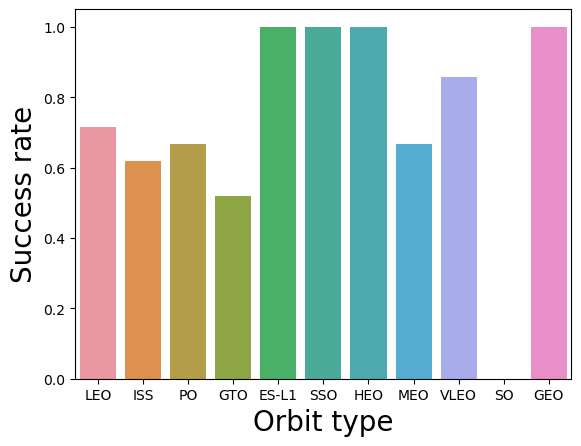

In [27]:
sns.barplot(y="Class", x="Orbit", data=data, errorbar=None)
plt.xlabel("Orbit type",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

We can notice that the majority of orbits have more than 50% of the success rate and even some ones are near 100% like SSO

**5- Visualize the relationship between FlightNumber and Orbit type**

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

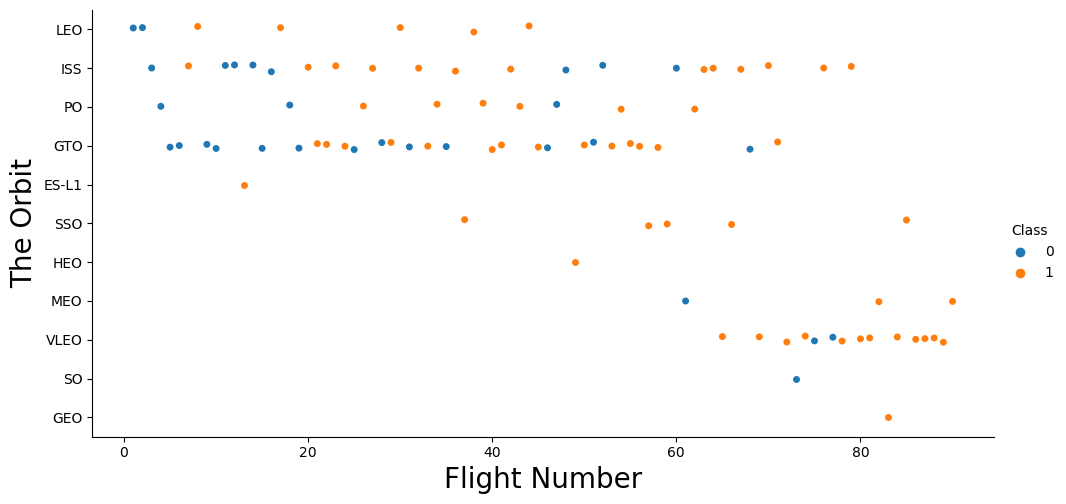

In [28]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=data, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("The Orbit",fontsize=20)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

**6-Visualize the relationship between Payload and Orbit type**

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

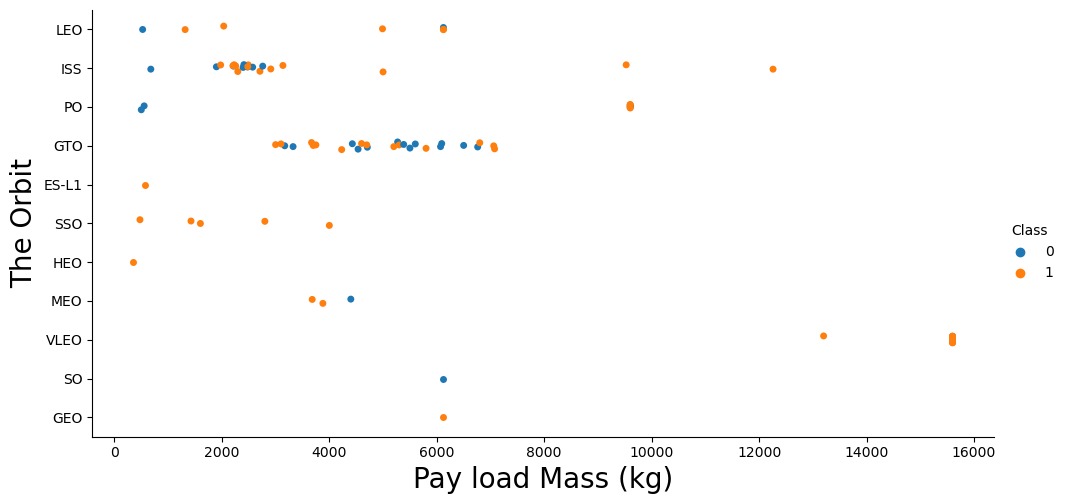

In [29]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=data, aspect = 2)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("The Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

**7- Visualize the launch success yearly trend**

We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [30]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
data['Date'] = year
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


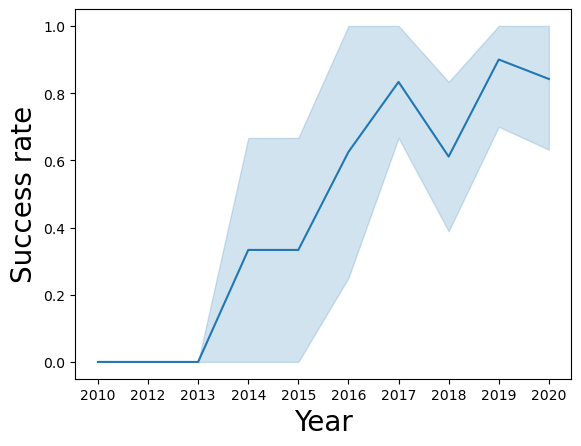

In [31]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(y="Class", x="Date", data=data)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

We note that the sucess rate since 2013 kept increasing till 2020

## Phase 6: Features Engineering

**1- Selecting the features**

We will select the features that will be used in success prediction in the future module

In [32]:
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs',
                 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### The correlation between features:

C:\Users\Admin\AppData\Local\Temp\ipykernel_16620\3957775667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features.corr()


              FlightNumber  PayloadMass   Flights  GridFins    Reused  \
FlightNumber      1.000000     0.597485  0.652842  0.442364  0.635844   
PayloadMass       0.597485     1.000000  0.667616  0.257870  0.469146   
Flights           0.652842     0.667616  1.000000  0.194457  0.782631   
GridFins          0.442364     0.257870  0.194457  1.000000  0.229341   
Reused            0.635844     0.469146  0.782631  0.229341  1.000000   
Legs              0.373619     0.192624  0.157727  0.902302  0.155552   
Block             0.932411     0.517606  0.519603  0.438023  0.548036   
ReusedCount       0.774832     0.621301  0.506952  0.363805  0.454834   

                  Legs     Block  ReusedCount  
FlightNumber  0.373619  0.932411     0.774832  
PayloadMass   0.192624  0.517606     0.621301  
Flights       0.157727  0.519603     0.506952  
GridFins      0.902302  0.438023     0.363805  
Reused        0.155552  0.548036     0.454834  
Legs          1.000000  0.368994     0.343275  
Block 

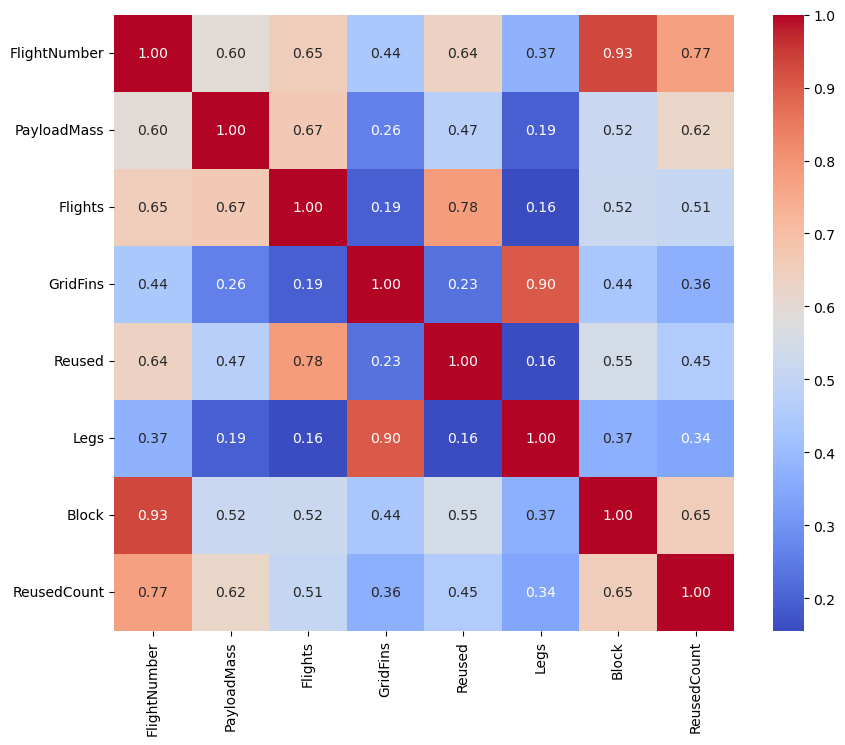

In [33]:

# Compute the correlation matrix
correlation_matrix = features.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**2- Create dummy variables to categorical columns**

In [34]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite','LandingPad','Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# merge data frame "df" and "dummy_variable_1" 
features_one_hot= pd.concat([features, features_one_hot], axis=1)

# drop original column "fuel-type" from "df"
features_one_hot.drop(['Orbit', 'LaunchSite','LandingPad','Serial'], axis = 1, inplace=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3- Cast all numeric columns to float64**

In [36]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

In [37]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

## Phase 7: Machine Learning Prediction

This function is to plot the confusion matrix.

In [38]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [39]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


In [40]:
X = features_one_hot

In [41]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1- Creating the label**

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [42]:
Y = data['Class'].to_numpy()

**2- Standardizing the data in features**

Standardize the data in X then reassign it to the variable X using the transform provided below.

In [43]:
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X)
X = pd.DataFrame(X_standardized, columns=X.columns)

**3- Splitting the data into training and testing**

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
Y_test.shape

(18,)

**4- Logistic Regression model**

Logistic regression is a statistical algorithm used for binary classification tasks, where the outcome or target variable is categorical and has two possible outcomes (e.g., yes/no, true/false, 0/1). Despite its name, logistic regression is used for classification rather than regression.

We will create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10. After that we will fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [46]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [47]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [48]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


We calculate the accuracy on the test data using the method score:

In [49]:
accuracy_lg = logreg_cv.score(X_test, Y_test)
accuracy_lg

0.8333333333333334

Lets look at the confusion matrix:

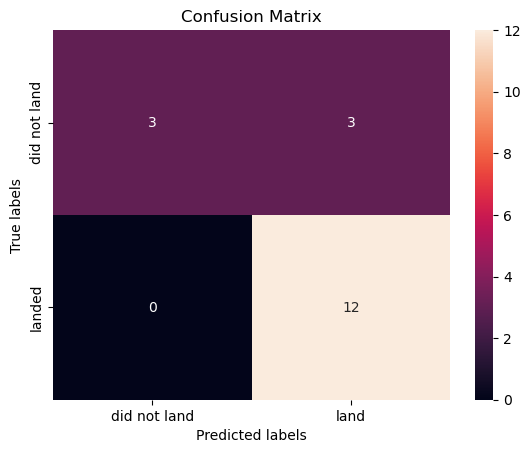

In [50]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

**5- Support Victor Machine model**

Support Vector Machines (SVM) is a supervised machine learning algorithm used for both classification and regression tasks, although it is primarily known for its effectiveness in classification. SVM is particularly useful when dealing with complex, high-dimensional datasets where there is a need to find a clear boundary between classes.

We will create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Afetr that we will fit the object to find the best parameters from the dictionary parameters.

In [51]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [52]:
svm_cv = GridSearchCV(svm, parameters, cv= 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [53]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [54]:
accuracy_svm = svm_cv.score(X_test, Y_test)
accuracy_svm

0.8333333333333334

We can plot the confusion matrix

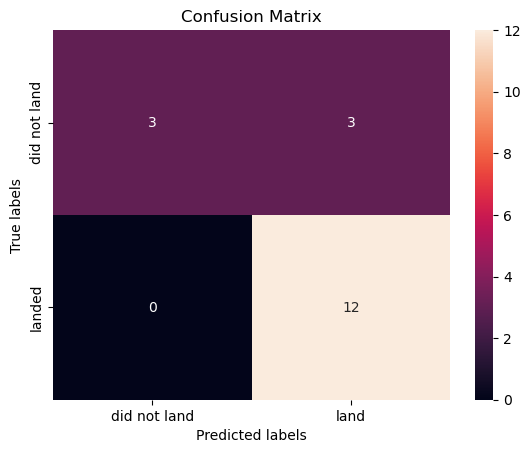

In [55]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that support victor machine can distinguish between the different classes. We see that the major problem is false positives.

**6- Decision Tree Classifier model**

The Decision Tree Classifier is a popular supervised machine learning algorithm used for classification tasks. It works by recursively partitioning the input space (feature space) into regions that are increasingly homogeneous with respect to the target variable (class label).

We will create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. After tha we will fit the object to find the best parameters from the dictionary parameters.

In [55]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto','sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [66]:
tree_cv = GridSearchCV(tree, parameters, cv= 10)
tree_cv.fit(X_train, Y_train)

In [57]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.875


We calculate the accuracy of tree_cv on the test data using the method score

In [58]:
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_tree

0.7222222222222222

We can plot the confusion matrix

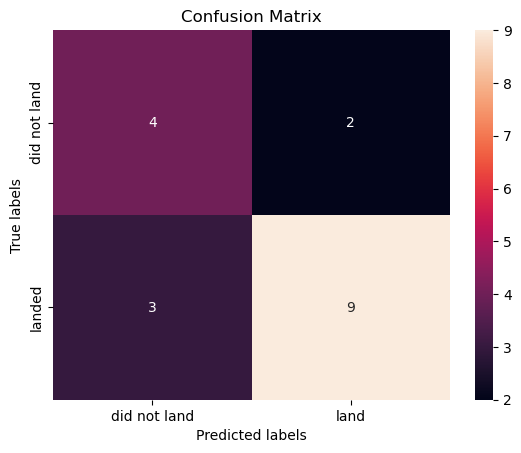

In [59]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

This confusion matrix highlights the need for optimizing the model to reduce false negatives and enhance its ability to correctly identify positive instances.

**7- k Nearest Neighbors model**

The k-Nearest Neighbors (k-NN) algorithm is a simple and effective supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of input data points in the feature space.

We will create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10.After that wwe will fit the object to find the best parameters from the dictionary parameters.

In [60]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [61]:
knn_cv = GridSearchCV(KNN, parameters, cv= 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [62]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


We calculate the accuracy of knn_cv on the test data using the method score

In [63]:
accuracy_knn = knn_cv.score(X_test, Y_test)
accuracy_knn

0.7777777777777778

We can plot the confusion matrix

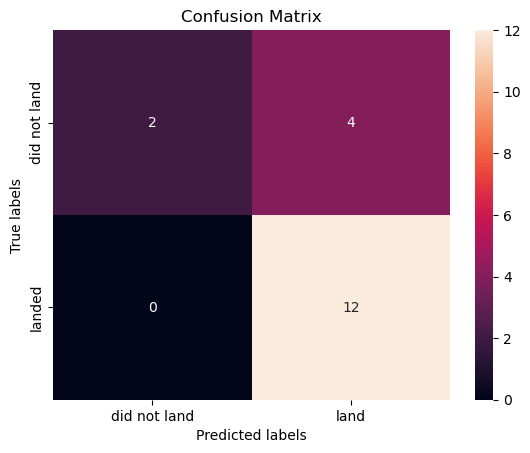

In [64]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

This confusion matrix highlights the need for refining the model to achieve better balance in its predictions, particularly focusing on reducing false positives and improving the ability to correctly identify negative instances.

**8- Find the method performs best**

In [65]:
perfermanse_results = {
    "Accuracy": ["Logistic regression", "support vector machine", "decision tree classifier", "K nearest neighbors"],
    "result": [accuracy_lg, accuracy_svm, accuracy_tree, accuracy_knn]
}

perfermanse_results = pd.DataFrame(perfermanse_results)

# Find the method that has the highest accuracy
best_method = perfermanse_results.loc[perfermanse_results['result'].idxmax(), 'Accuracy']

print("Best Accuracy:", best_method)

Best Accuracy: Logistic regression


## Conclusion

The logistic regression is favored for binary classification tasks due to its simplicity, interpretability, efficiency, and effectiveness in many practical scenarios. 